The following data analysis has been performed with the useful help of Jeremy Manning. Hence, the comments to the code used will be limited. 

# Setup


The following python libraries were used to perform the following analysis.

In [ ]:
!pip install git+https://github.com/ContextLab/davos.git
import davos #this provides the "smuggle" keyword-- used as a more robust version of "import"

  Cloning https://github.com/ContextLab/davos.git to /tmp/pip-req-build-pefzaaob
  Running command git clone -q https://github.com/ContextLab/davos.git /tmp/pip-req-build-pefzaaob
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [ ]:
from nltk smuggle word_tokenize
from nltk.corpus smuggle stopwords, wordnet
from sklearn.decomposition smuggle LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text smuggle CountVectorizer, TfidfVectorizer
from sklearn.feature_selection smuggle VarianceThreshold
from scipy smuggle stats
from sklearn.cluster smuggle KMeans
from sklearn.model_selection smuggle GridSearchCV
from scipy.spatial.distance import pdist, squareform

smuggle docx #pip: python-docx
smuggle os
smuggle nltk
smuggle string, math, json, pickle
smuggle pandas as pd
smuggle scipy.signal as signal
smuggle scipy.interpolate as interpolate
smuggle hdbscan
smuggle hypertools as hyp #pip: hypertools
smuggle numpy as np
smuggle scipy as sp
smuggle seaborn as sns
smuggle requests
smuggle zipfile
from nltk.stem smuggle WordNetLemmatizer
smuggle matplotlib.pyplot as plt
smuggle datetime as dt
from glob smuggle glob as lsdir
 

In addition, the preliminary operations have been performed:<br>
 
-  _stopwords_ have been imported and defined
- customized _stopwords_ have been defined and merged to the set of _stopwords_ 
- a random seed has been set


In [ ]:
#download nltk data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#being the analysis conducted below probabilistic, a random seed is set
np.random.seed(0)

In [ ]:
#define custom stop words
custom_stops = {"0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't","dont",  "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "itll", "its", "it's", "itself", "iv", "i've", "ive","ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thatll'","thatll","thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "thing","think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're","weren", "werent", "weren't", "we've", "weve","what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y","yeah", "y2", "yes", "yet", "yj", "yl","r", "you", "hes", "youd", "you'd", "you'll", "youll","your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"}
stop_words = set(stopwords.words('english')).union(custom_stops)

# Project team
 
The team member for this project is Elisa Brosera' and Annemarija Apine.<br>
I, Elisa Brosera', came up with the idea of analysing TED talks, elaborated the code with the professor and attempted to derive interpretations with him. However, Annemarija was extremely helpful in writing and revising a structured script for story 5 and 6. She was responsable for part of presentation of story 5 and presentation of story 6.

# Background and overview

After having visited the Contextual Dynamics Lab of Jemery Manning and his team and in particular reading the paper _"Geometric models reveal behavioural and neural signatures of transforming naturalistic experiences into episodic memories"_(https://github.com/ContextLab/sherlock-topic-model-paper), <br> I was extremely fascinated by the idea of implementing the geometric topic trajectories described in the paper to compare TED talks and provide potential reasons for differences in views.

# Approach

The main initial question behind this analysis is what makes a TED talk successful. To do so, a dataset of the transcripts of 10 talks(5 most viewed and 5 least viewed from their website) has been collected to investigate how linguistics affects their popularity. An in-depth analysis has been then performed on the average length of words used, on the variety in topics of the videos and on potential themes to which the topics relate. 
NB: the main results have been achieved fitting a _Topic model_ to the talks' transcripts.

# Quick summary

Our analysis of the TED talks resulted in the following main ideas: <br>
1 - The use of simple short words makes a TED talk successful <br>

2 - Top talks appear to be correlated to many topics, whereas less popular talks are correlated with just one or a couple <br>
2.A - We will give 2 interpretations to it: first, popular talks use simple short words, visual exaples, vivid similes and methafors, which are intrinsically not uniquelly related to one topic.(STORY 5 and again 6)<br>
Second, popular TED talks deal with more broad topics(e.g. leadership, education, vulnerability...) which relate to everyone.(STORY 6)

We have also speculated on potential themes related to the 10 topics defined in the Topic model. Some themes may be geopolitics, sharks, knowledge and femininity.




# Data

Briefly describe your dataset(s), including links to original sources.  Provide any relevant background information specific to your data sources.

In [ ]:
#code for downloading files from given url
def download_and_extract(url):
  req = requests.get(url)
  fname = url.split('/')[-1][:-len('?dl=1')].replace('%20', ' ')

  with open(fname, 'wb') as fd:
    fd.write(req.content)
  
  with zipfile.ZipFile(fname) as z:
    z.extractall(os.getcwd())
  
  return fname.split('.')[0]

In [ ]:
#the link containing the dataset, namely the transcripts of the 10 TED videos, has been stored in a new variable: transcripts_url 
transcripts_url = 'https://www.dropbox.com/s/1i8pzcrhc4wa12d/Story%205.zip?dl=1'
datadir = download_and_extract(transcripts_url)

In [ ]:
#extracting text from a docx file
def get_text(fname):  
  doc = docx.Document(fname)
  txt = []
  for paragraph in doc.paragraphs:
    txt.append(paragraph.text)
  
  return '\n'.join(txt)

In [ ]:
#a function to extract the title of each document in the folder has been created
def get_title(fname):
  return fname.split('/')[-1][:-len('.docx')].lower()

In [ ]:
#storing top-view and least-view videos
least_viewed_transcripts = {get_title(f): get_text(f) for f in lsdir(os.path.join(datadir, 'least views', '*.docx'))}
most_viewed_transcripts = {get_title(f): get_text(f) for f in lsdir(os.path.join(datadir, 'most views', '*.docx'))}

# Analysis

Briefly describe each step of your analysis, followed by the code implementing that part of the analysis and/or producing the relevant figures.  (Copy this text block and the following code block as many times as are needed.)

- WORDS ANALYSIS on videos

In [ ]:
#computing word count matrices
all_transcripts = [v for k, v in {**least_viewed_transcripts, **most_viewed_transcripts}.items()]
video_titles = [k for k, v in {**least_viewed_transcripts, **most_viewed_transcripts}.items()]

In [ ]:
#list containing avg word length per video
average_word_lengths = [np.mean([len(w) for w in all_transcripts[i].split()]) for i in range(len(video_titles))]

In [ ]:
average_word_lengths

[4.575064935064935,
 4.674237047551455,
 4.641679748822606,
 4.516018306636155,
 4.667710371819961,
 4.56039603960396,
 4.50929203539823,
 4.3691468890314304,
 4.4627388535031844,
 4.489431786988746]

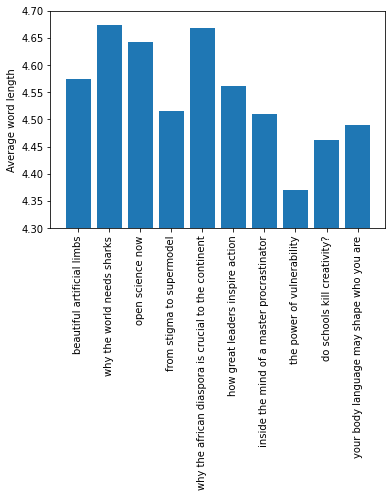

In [ ]:
#bar plot for avg length of words
plt.bar(x=range(len(video_titles)), height=average_word_lengths)
plt.xticks(range(len(video_titles)), labels=video_titles, rotation=90);
plt.ylabel('Average word length');
plt.ylim([4.3, 4.7]);

- Fit topic models to video transcripts

Divide transcripts into sliding windows and compute topic trajectories

In [ ]:
w = 250         # window length, in words
dw = 25         # window increment, in words
N = 500         # number of timepoints in resampled videos
s = 51          # smoothing kernel width (positive odd integer)

In [ ]:
def clean_text(x):
  letters = 'abcdefghijklmnopqrstuvwxyz'
  return ''.join([c for c in x.lower() if c in letters])

In [ ]:
def sliding_windows(transcript, w, dw):
  words = [clean_text(x) for x in transcript.split() if len(clean_text(x)) > 0]
  windows = []
  
  i = 0
  while i <= len(words) - w:
    windows.append(' '.join(words[i:(i+w)]))
    i += dw
  
  return windows

In [ ]:
all_windows = []
for t in all_transcripts:
  all_windows.extend(sliding_windows(t, w, dw))

In [ ]:
vectorizer = CountVectorizer(analyzer='word', lowercase=True, min_df=0.01, max_df=0.25)
vectorized_transcripts = vectorizer.fit_transform(all_windows)

In [ ]:
K = 10  # number of topics
lda = LatentDirichletAllocation(n_components=K, learning_method='online')
lda_data = lda.fit_transform(vectorized_transcripts)

In [ ]:
#displaying top words from the model
def get_top_words(lda_model, vectorizer, n_words=10):
  vocab = {v: k for k, v in vectorizer.vocabulary_.items()}
  top_words = []
  for k in range(lda_model.components_.shape[0]):
      top_words.append([vocab[i] for i in np.argsort(lda_model.components_[k, :])[::-1][:n_words]])
  return top_words

def display_top_words(lda_model, vectorizer, n_words=10):
  print(f'Top {n_words} words by topic:\n')
  for k, w in enumerate(get_top_words(lda_model, vectorizer, n_words=n_words)):
      print(f'topic {k}: {", ".join(w)}')

display_top_words(lda, vectorizer)

Top 10 words by topic:

topic 0: kids, albinism, shes, started, her, found, images, through, friend, show
topic 1: sharks, than, over, every, numb, important, feel, research, shark, lives
topic 2: idea, science, project, end, some, doing, knowledge, job, scientists, problems
topic 3: being, feel, powerful, also, vulnerability, okay, minutes, tell, shame, call
topic 4: believe, buy, his, brain, first, two, yes, made, feel, didnt
topic 5: her, did, went, shes, school, kids, got, down, kid, life
topic 6: two, minutes, till, fake, situation, become, best, leave, oh, am
topic 7: education, public, africa, come, service, system, years, south, country, man
topic 8: body, sense, doesnt, times, language, lot, makes, monkey, hard, two
topic 9: power, should, ourselves, find, political, little, percent, enough, give, same


Topic trajectories

In [ ]:
def topic_trajectory(x, window_length, dw, lda, vectorizer):
  df = pd.DataFrame([clean_text(w) for w in x.split() if len(clean_text(w)) > 0]).rename({0: 'word'}, axis=1)
  trajectory = pd.DataFrame(columns=np.arange(lda.n_components))

  try:
    start_time = np.min(df.index.values)
    end_time = np.max(df.index.values)
  except:    
    return None

  window_start = start_time
  while window_start < end_time:
    window_end = np.min([window_start + window_length - dw, end_time])
    try:
      trajectory.loc[np.mean([window_start, window_end])] = lda.transform(vectorizer.transform([' '.join(df.loc[window_start:window_end]['word'])]))[0]
    except:
      pass
    
    window_start += dw
  return trajectory

In [ ]:
def resample_and_smooth(traj, kernel_width, N=500, order=3, min_val=0):
  if traj is None or traj.shape[0] <= 3:
    return None

  try:
    r = np.zeros([N, traj.shape[1]])
    x = traj.index.values
    xx = np.linspace(np.min(x), np.max(x), num=N)

    for i in range(traj.shape[1]):
      r[:, i] = signal.savgol_filter(sp.interpolate.pchip(x, traj.values[:, i])(xx),
                                     kernel_width, order)
      r[:, i][r[:, i] < min_val] = min_val
    
    return pd.DataFrame(data=r, index=xx, columns=traj.columns)
  except:
    return None

In [ ]:
trajectories = [topic_trajectory(t, w, dw, lda, vectorizer) for t in all_transcripts]


In [ ]:
resampled_trajectories = [resample_and_smooth(t, s, N=N) for t in trajectories]

- plot GRAPHS

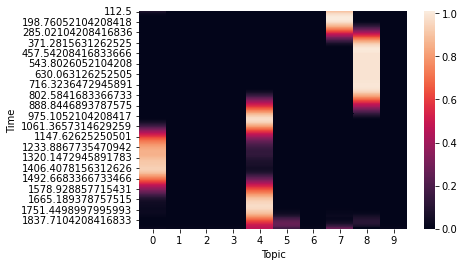

In [ ]:
#heatmap of top video
sns.heatmap(resampled_trajectories[0])
plt.xlabel('Topic');
plt.ylabel('Time');

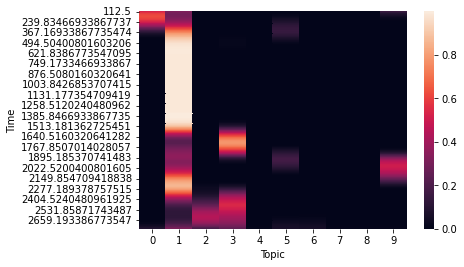

In [ ]:
#heatmap of top video
sns.heatmap(resampled_trajectories[1])
plt.xlabel('Topic');
plt.ylabel('Time');

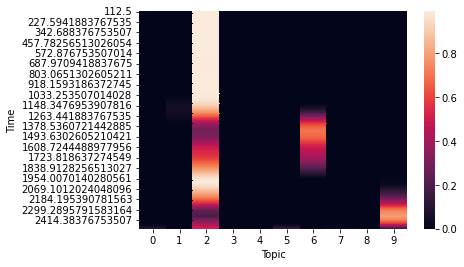

In [ ]:
#heatmap of top video
sns.heatmap(resampled_trajectories[2])
plt.xlabel('Topic');
plt.ylabel('Time');

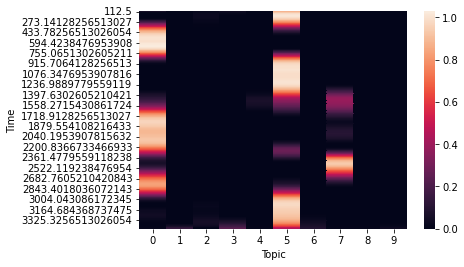

In [ ]:
#heatmap of top video
sns.heatmap(resampled_trajectories[3])
plt.xlabel('Topic');
plt.ylabel('Time');

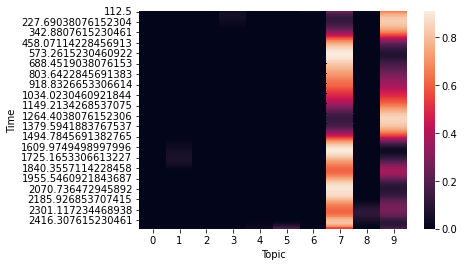

In [ ]:
#heatmap of top video
sns.heatmap(resampled_trajectories[4])
plt.xlabel('Topic');
plt.ylabel('Time');

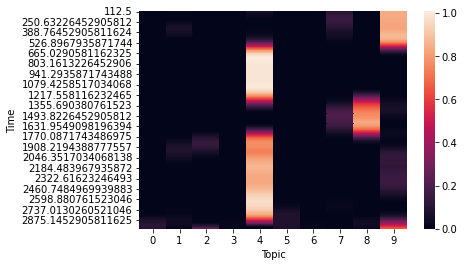

In [ ]:
#heatmap of top video
sns.heatmap(resampled_trajectories[5])
plt.xlabel('Topic');
plt.ylabel('Time');

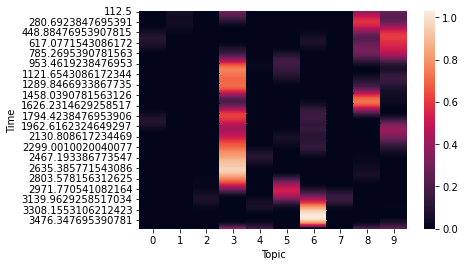

In [ ]:
#heatmap of top video
sns.heatmap(resampled_trajectories[9])
plt.xlabel('Topic');
plt.ylabel('Time');

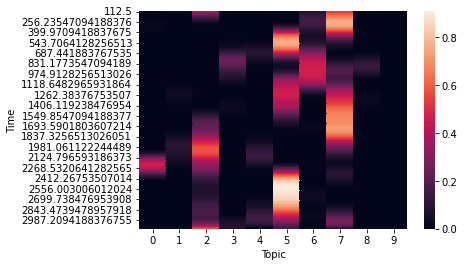

In [ ]:
#heatmap of top video
sns.heatmap(resampled_trajectories[8])
plt.xlabel('Topic');
plt.ylabel('Time');

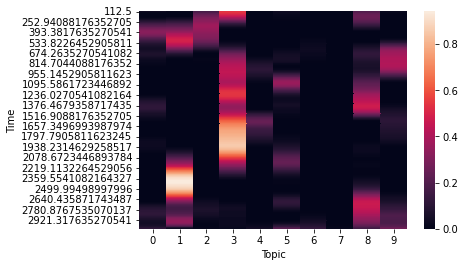

In [ ]:
#heatmap of top video
sns.heatmap(resampled_trajectories[7])
plt.xlabel('Topic');
plt.ylabel('Time');

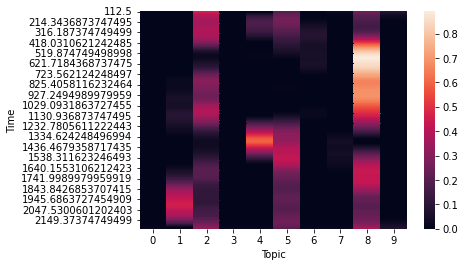

In [ ]:
#heatmap of top video
sns.heatmap(resampled_trajectories[6])
plt.xlabel('Topic');
plt.ylabel('Time');

In [ ]:
per_lecture_topics = lda.transform(vectorizer.transform(all_transcripts))

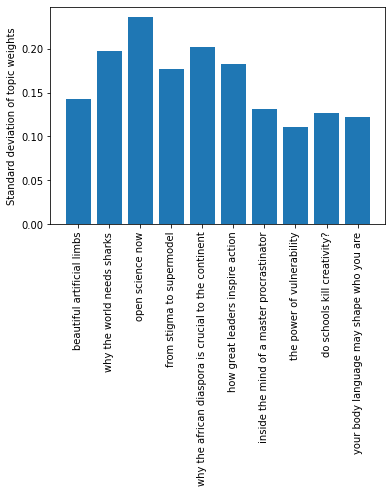

In [ ]:
#bar plot for standard deviation of words
plt.bar(x=range(len(video_titles)), height=np.std(per_lecture_topics, axis=1))
plt.xticks(range(len(video_titles)), labels=video_titles, rotation=90);
plt.ylabel('Standard deviation of topic weights');

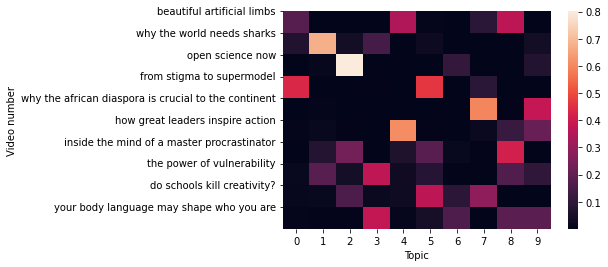

In [ ]:
#heatmap
sns.heatmap(per_lecture_topics)
plt.xlabel('Topic')
plt.ylabel('Video number')
plt.yticks(range(len(video_titles)), labels=video_titles, rotation=0);

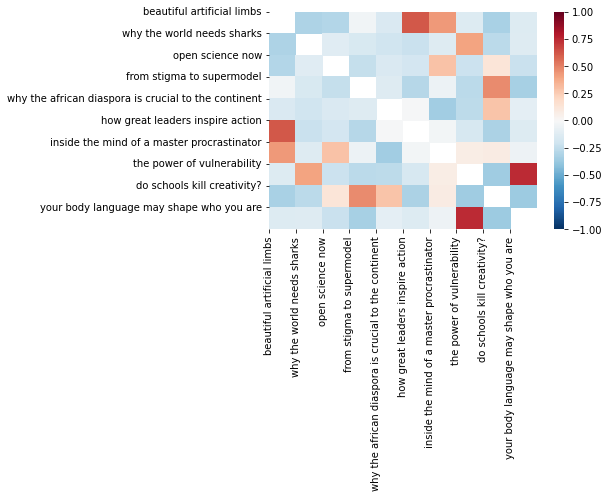

In [ ]:
#correlation matrix
corrs = 1 - squareform(pdist(per_lecture_topics, metric='correlation'))
np.fill_diagonal(corrs, np.nan)
sns.heatmap(corrs, cmap='RdBu_r', vmin=-1, vmax=1, center=0)
plt.xticks(range(len(video_titles)), labels=video_titles, rotation=90);
plt.yticks(range(len(video_titles)), labels=video_titles, rotation=0);

# Interpretations and conclusions

As mentioned in the quick summary, using simple short words to tell powerful ideas is the first key lesson to learn on successful TED talks. This is evident form the distribution of the average word length across videos.
From the heatmaps and the correlation matrix plotted, it seems that top talks are weakly correlated to many topics, previously identified through a topic model, and that popular videos are more correlated to each other than unpopular talks do. The interpretation of this analytic result is much less straighforward. It could mean that a top talk touches several themes or that the topic dealt with is so broad that the words used could be applied in many different contexts or that, as strongly believed in this analysis, that examples, similes, anecdotes being meant to semplify concepts and ideas are general and less specific. Hence, it is hard to collocate them in a specific topic!
This was meant to be an unconventional and original approach to analyse TED talks.

# Future directions

Would the result of this analyis change if the sample of videos is extended to a larger set? What if some talks with average views are compared to top-viewed or least-viewed talks? Are the outcomes of 100 topics analysis significantly different from this one? What are the effects on the heatmap and the correlation matrix of an increase in topics fitted? 

Moreover, personally speaking it would be extremely interesting to have a deeper understanding of the Topic Model and his fit to build 'video trajectories'. In this way, interesting results could be derived from their 3-D representations.